# Preview Data from ERDDAP for EcoFOCI Moorings 

Using 1hr gridded data from AKUTAN

In [18]:
from erddapy import ERDDAP

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

import cmocean

In [39]:
server_url = 'http://akutan.pmel.noaa.gov:8080/erddap'

datasetID = '1hr_gridded_datasets_Mooring_18bs4b_final'

In [40]:
e = ERDDAP(server=server_url)

e.constraints = None
e.protocol = 'griddap'

opendap_url = e.get_download_url(
    dataset_id=datasetID,
    response='opendap',
)

print(opendap_url)

http://akutan.pmel.noaa.gov:8080/erddap/griddap/1hr_gridded_datasets_Mooring_18bs4b_final


In [41]:
from netCDF4 import Dataset

with Dataset(opendap_url) as nc:
    print(nc.summary)

OSError: [Errno -90] NetCDF: file not found: b'http://akutan.pmel.noaa.gov:8080/erddap/griddap/1hr_gridded_datasets_Mooring_18bs4b_final'

In [42]:
e.dataset_id=datasetID
e.response = 'nc'
ds = e.to_xarray(decode_times=True)

HTTPError: Error {
    code=404;
    message="Not Found: Currently unknown datasetID=1hr_gridded_datasets_Mooring_18bs4b_final";
}


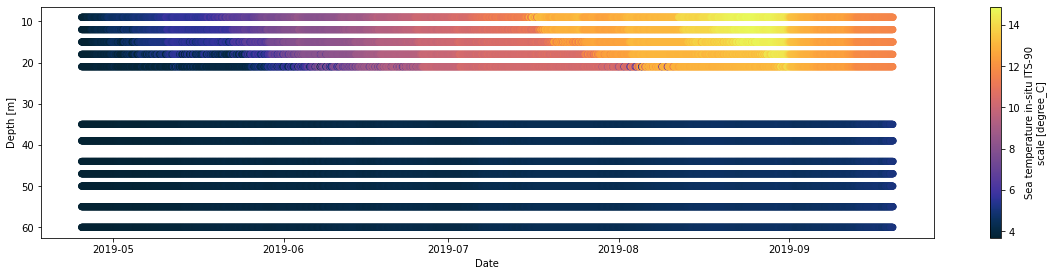

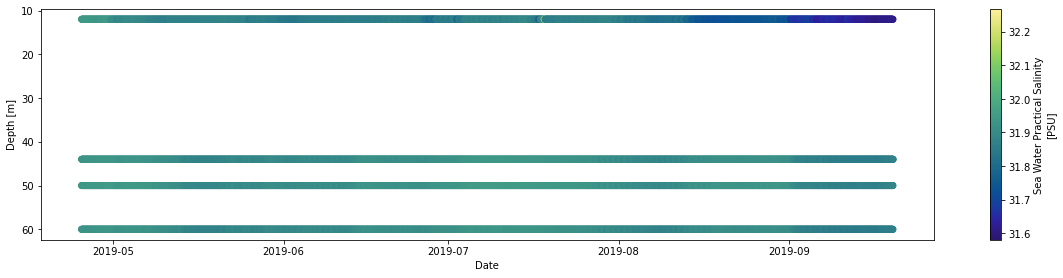

In [34]:
fig, (ax1) = plt.subplots(nrows=1, sharex=True, figsize=(20,4.25))
ds.plot.scatter(x='time',y='depth',hue='temperature', cmap=cmocean.cm.thermal, ax=ax1)
ax1.invert_yaxis()

fig, (ax1) = plt.subplots(nrows=1, sharex=True, figsize=(20,4.25))
ds.plot.scatter(x='time',y='depth',hue='salinity', cmap=cmocean.cm.haline, ax=ax1)
ax1.invert_yaxis()

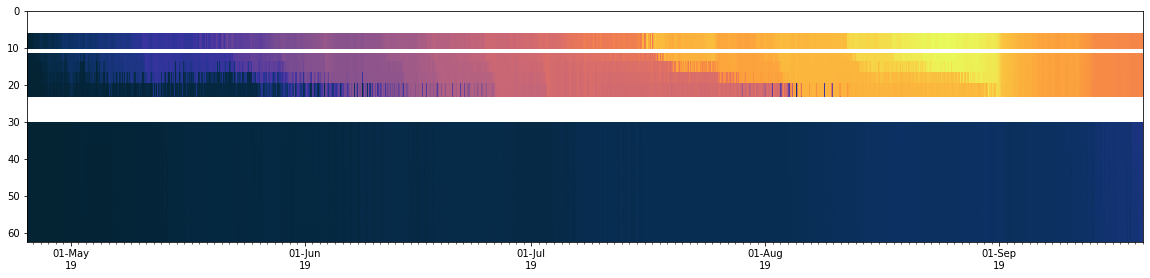

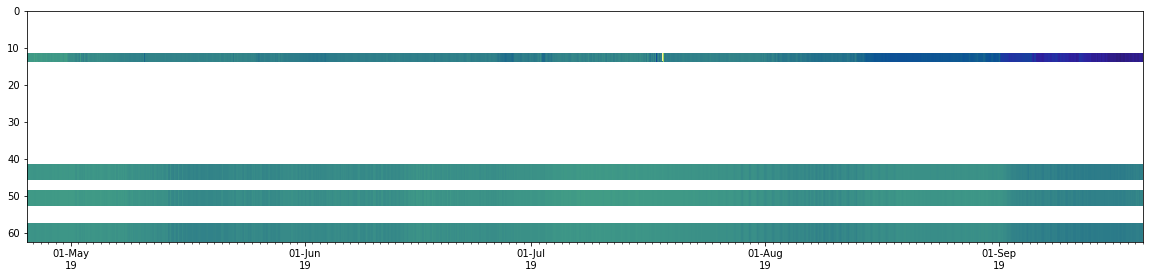

In [38]:
#or better yet
fig, (ax1) = plt.subplots(nrows=1, sharex=True, figsize=(20,4.25))

ax1.pcolormesh(ds.time,ds.depth,ds.temperature,
                     cmap=cmocean.cm.thermal, shading='auto')

ax1.invert_yaxis()
xfmt = mdates.DateFormatter('%d-%b\n%y')
ax1.xaxis.set_major_formatter(xfmt)
ax1.xaxis.set_major_locator(MonthLocator())
ax1.xaxis.set_minor_locator(DayLocator())

fig, (ax1) = plt.subplots(nrows=1, sharex=True, figsize=(20,4.25))

ax1.pcolormesh(ds.time,ds.depth,ds.salinity,
                     cmap=cmocean.cm.haline, shading='auto')

ax1.invert_yaxis()
xfmt = mdates.DateFormatter('%d-%b\n%y')
ax1.xaxis.set_major_formatter(xfmt)
ax1.xaxis.set_major_locator(MonthLocator())
ax1.xaxis.set_minor_locator(DayLocator())